<a href="https://colab.research.google.com/github/FanesabhirawaningSulistyo/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut


Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


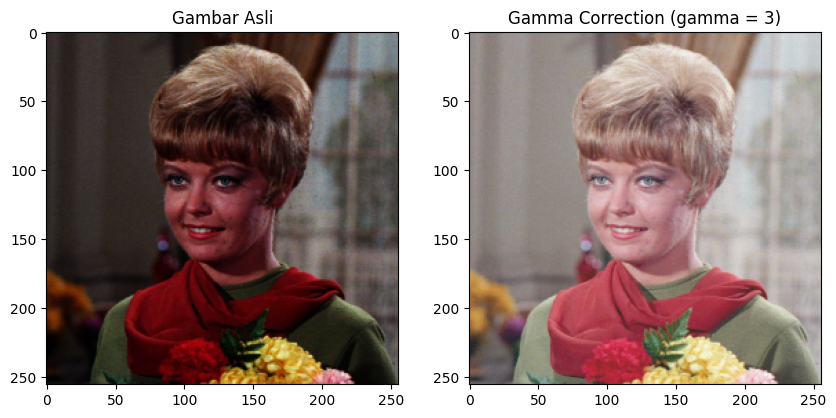

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (gamma = {gamma})')

plt.show()

Gambar diatas adalah citra yang diproses menggunakan Gamma Correction nilai
gamma 3.

2. Buat Simulasi Image Depth


Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst

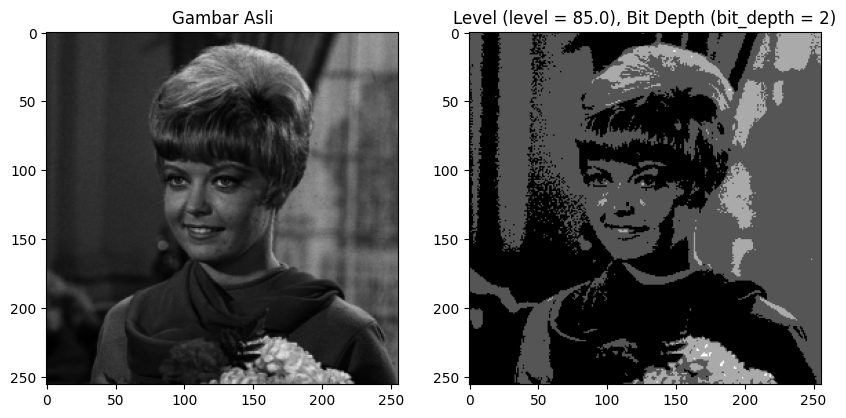

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(depth_image, cv.COLOR_BGR2RGB))
plt.title(f'Level (level = {level}), Bit Depth (bit_depth = {bit_depth})')

plt.show()

3. Buat modul Average Denoising


Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

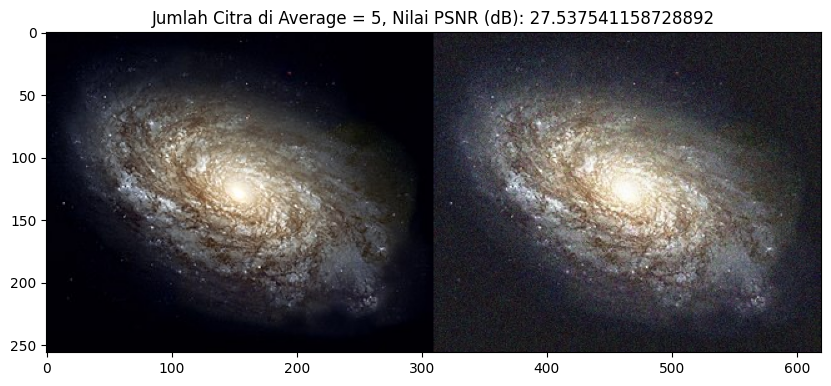

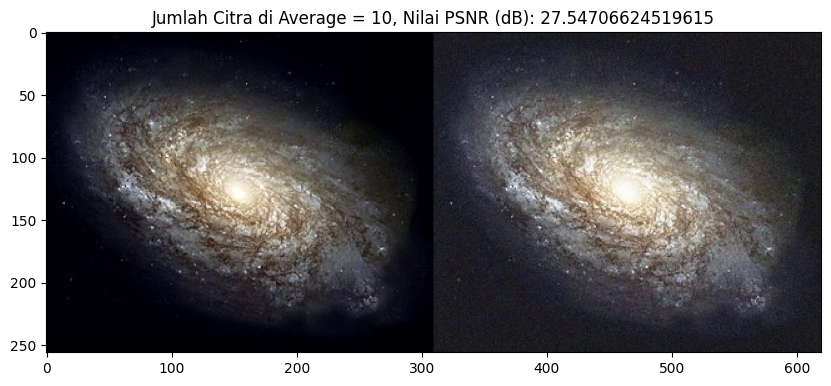

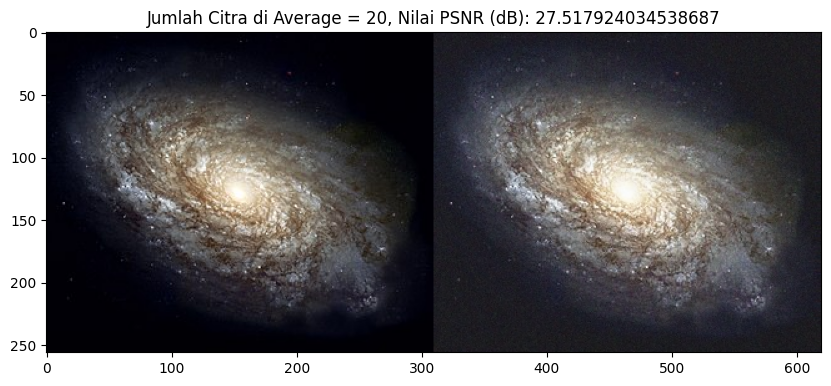

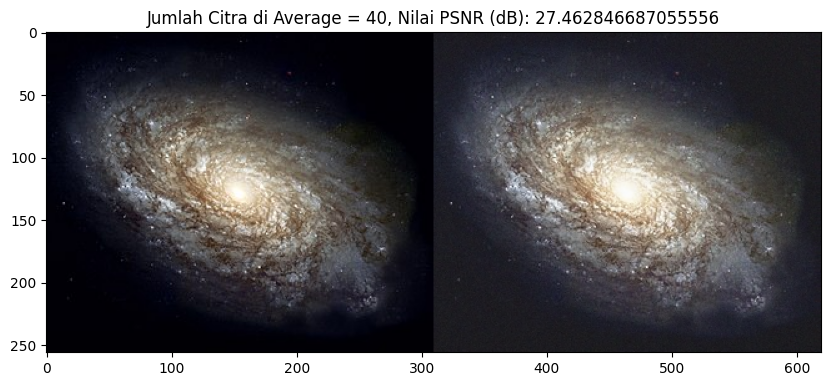

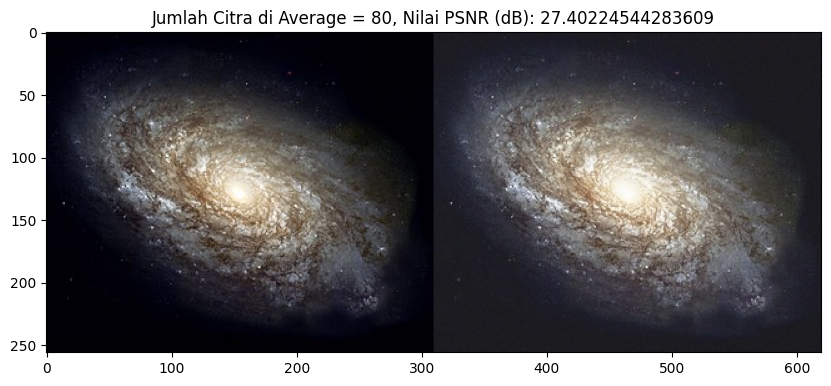

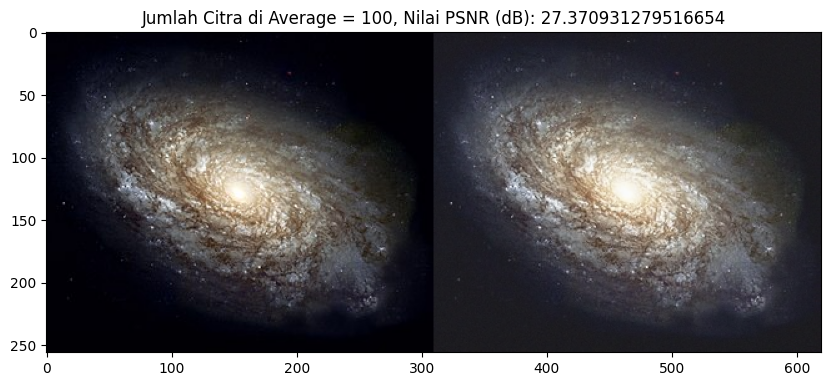

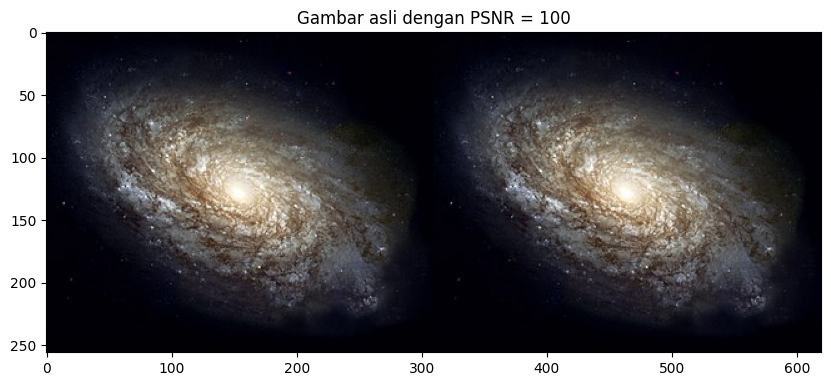

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error (MSE)
    if mse == 0:  # Jika tidak ada noise, PSNR mencapai maksimum
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Memuat gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek apakah gambar asli berhasil dimuat
if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan di-average
    list_img = [5, 10, 20, 40, 80, 100]

    for img_count in list_img:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        average_noise = np.zeros_like(original, dtype=np.float32)

        # Memuat dan mengakumulasi gambar dengan noise
        for i in range(1, img_count + 1):
            noise = cv.imread(f'/content/drive/MyDrive/PCVK/noises/{i}.jpg')

            # Cek apakah gambar dengan noise berhasil dimuat
            if noise is None:
                print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            # Mengakumulasi gambar dengan noise
            average_noise += noise.astype(np.float32)

        # Merata-ratakan gambar yang diakumulasi
        average_noise /= img_count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noise yang dirata-ratakan
        psnr = PSNR(original, average_noise)

        # Menggabungkan gambar asli dan gambar noise yang dirata-ratakan secara horizontal
        final_frame = cv.hconcat([original, average_noise])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB agar tampilan benar
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:}")
        plt.show()

    # PSNR antara gambar asli dan gambar yang dirata-rata (harusnya PSNR tertinggi)
    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
    plt.title(f"Gambar asli dengan PSNR = {psnr:}")
    plt.show()


**Kesimpulan:**

Kesimpulannya adalah semakin nilai PNSR mendekati 100, maka noise dari gambar tersebut semakin sedikit

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

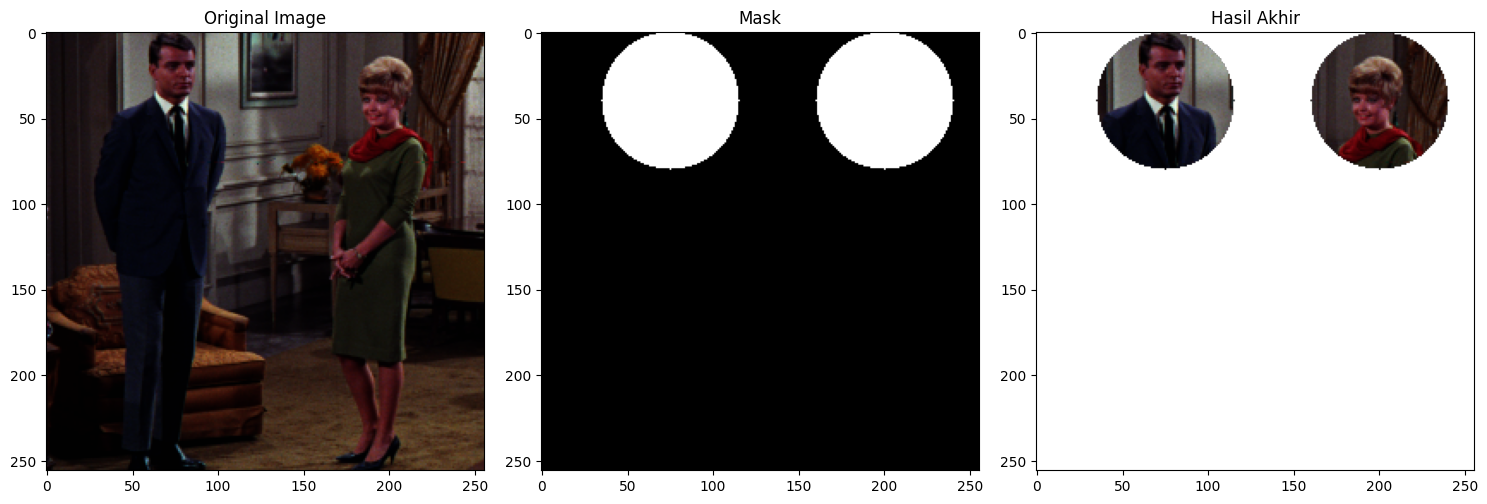

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK/couple.tiff'
img = cv.imread(image_path)

# Membuat mask dengan ukuran gambar
mask = np.zeros(img.shape[:2], dtype="uint8")

# Menggambar dua lingkaran
cv.circle(mask, (75, 40), 40, 255, -1)  # Lingkaran pertama
cv.circle(mask, (200, 40), 40, 255, -1)  # Lingkaran kedua

# Menggunakan bitwise AND untuk menerapkan mask pada gambar
masked = cv.bitwise_and(img, img, mask=mask)

# Mengonversi gambar yang dimask ke grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Mengatur threshold untuk membuat alpha channel
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan channel warna
b, g, r = cv.split(masked)

# Menggabungkan channel menjadi RGBA
rgba = [b, g, r, alpha]

# Menggabungkan menjadi gambar akhir
result = cv.merge(rgba)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

**Operasi NOT (komplemen)**

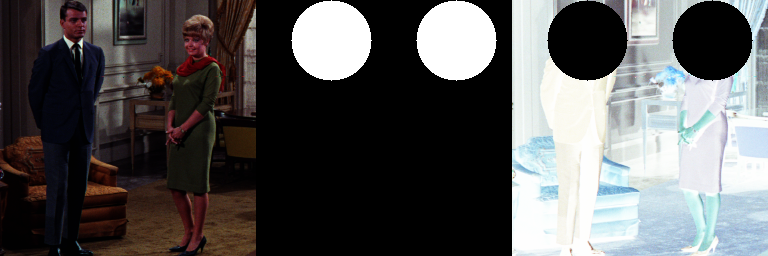

In [8]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask_not = np.zeros(img.shape, dtype = np.uint8)
mask_not = cv.circle(mask_not, (75,40), 40, (255,255,255), -1)

mask2_not = np.zeros(img.shape, dtype = np.uint8)
mask2_not = cv.circle(mask_not, (200,40), 40, (255,255,255), -1)

result = cv.bitwise_not(img) & cv.bitwise_not(mask_not)

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

Gambar img menjadi inverse karna not dari sebuah image merupakan nilai inverse nya dan mask yang berwarna putih menjadi hitam karena nilai not dari mask_not merupakan bagian yang bukan lingkarannya.

**Operasi OR (atau)**

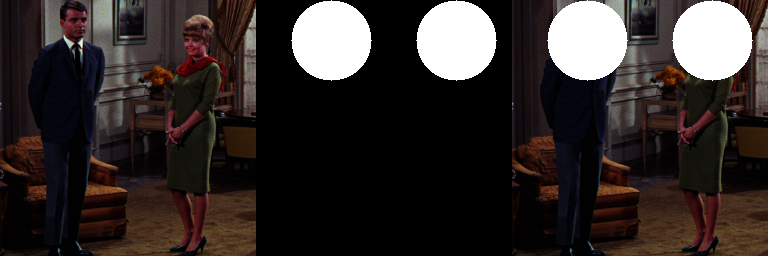

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask_or = np.zeros(img.shape, dtype = np.uint8)
mask_or = cv.circle(mask_or, (75,40), 40, (255,255,255), -1)

mask2_or = cv.circle(mask_or, (200,40), 40, (255,255,255), -1)

result = mask_or | img

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

Ketika menggunakan operasi OR maka semua bagian yang di img dan bagian lingkaran max memenuhi kebutuhan sehingga img dan max_or akan di gabungkan dan keduanya memenuhi sehingga tampil seluruh img berwarna yang di tumpuk oleh linkaran mask_or.

**Operator AND (Dan)**

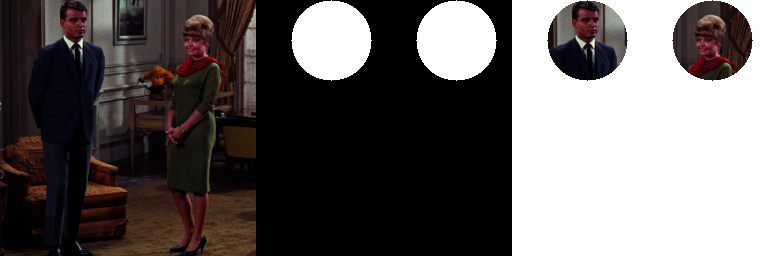

In [10]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (75,40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (200,40), 40, (255,255,255), -1)

result = img & mask & mask2

result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Menggunakan operasi AND memiliki hasil yang sama seperti contoh dimana elemen yang diambil adalah gambar yang memiliki letak bertepatan dengan mask (lingkarannya).

**Operator NAND (Not And)**

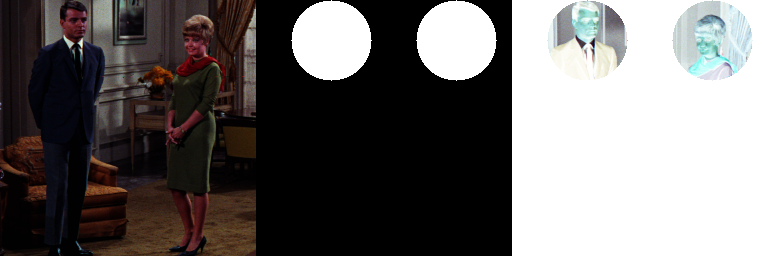

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (75,40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (200,40), 40, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img,mask))

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

Menggunakan operator NAND yaitu melakukan operasi and terlebih dahulu yang menghasilkan gambar yang muncul hanya yang memiliki letak bertepatan dengan mask(lingkaran) setelah itu barulah dilakukan not untuk img dan mask sehingga bagian diluar lingkaranlah yang berwarna putih dan bagian lingkaran menjadi lubang dan ketika di gabungkan dengan img maka akan terlihat bagian img yang memiliki letak sama dengan lingkaran yang lubang tadi.

**Operator XOR (Exlusive Or)**

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (75,40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (200,40), 40, (255,255,255), -1)

result = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

Untuk operator XOR bagian yang beririsan dari image dan mask akan di tampilkan dengan hasil inverse dan bagian yang tidak beririsan antara image dan mask akan tetap di tampilkan seperti gambar image sebenarnya.

### Berikut adalah hasil analisa saya :

NOT: Operasi NOT pada gambar akan menghasilkan gambar yang merupakan inversi dari gambar asli, dengan setiap piksel yang semula gelap menjadi terang dan sebaliknya.

OR: Operasi OR pada dua gambar akan menghasilkan gambar yang setiap pikselnya adalah hasil dari OR logika antara dua piksel yang bersesuaian dari kedua gambar tersebut. Jadi, jika salah satu piksel memiliki nilai warna yang terang, maka hasilnya akan terang.

AND: Operasi AND pada dua gambar akan menghasilkan gambar yang setiap pikselnya adalah hasil dari AND logika antara dua piksel yang bersesuaian dari kedua gambar tersebut. Piksel pada gambar hasil akan terang hanya jika kedua piksel asli memiliki nilai warna yang terang.

NAND: Operasi NAND pada dua gambar akan menghasilkan gambar yang setiap pikselnya adalah hasil dari NAND logika antara dua piksel yang bersesuaian dari kedua gambar tersebut. Piksel pada gambar hasil akan terang jika kedua piksel asli memiliki nilai warna yang sama, dan kemudian warna tersebut diubah menjadi inversinya.